# HW3-DSC 478

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn import feature_selection
from sklearn.model_selection import cross_validate,train_test_split,cross_val_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import GridSearchCV


# Q1 _ LINEAR REGRESSION


<b>a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [5]:
import os
os.chdir('/Users/burcu.alagoz/Desktop/HW3/communities')

In [9]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [15]:
#load dataset
communities = pd.read_csv("communities.csv", na_values = ['?'])
communities.OtherPerCap.fillna(communities.OtherPerCap.mean(), axis = 0, inplace = True)

In [16]:
communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [17]:
target = communities['ViolentCrimesPerPop']

In [18]:
communities= communities.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1)

In [19]:
communities.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


<b> b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.cross_validation).

In [20]:
target = np.array(target).astype(np.float)

In [21]:
comm = np.array(communities).astype(np.float)

In [22]:
# Performing the standard linear regression on data using the implementation for Ch. 8 of MLA. 
lnr_reg = LinearRegression()
lnr_reg.fit(comm, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred = lnr_reg.predict(comm)
err = abs(pred - target)
print(err[:10])

[0.03448162 0.37937027 0.04632201 0.20270857 0.05129155 0.09017938
 0.05800201 0.1076608  0.29252029 0.14473903]


In [24]:
#Compute the RMSE value on the full training data. 
rmse_train = np.sqrt(np.dot(err, err)/len(pred))
print(rmse_train)

0.12888960779787603


In [25]:
# Display the obtained regression coefficients (weights).
print('Regression Coefficients: \n', lnr_reg.coef_)

Regression Coefficients: 
 [ 1.31108068e-01 -3.14114977e-02  2.09909670e-01 -4.05351612e-02
 -1.38892919e-02  5.89726825e-02  1.23399025e-01 -2.22621600e-01
 -1.47500199e-01  5.01635477e-02 -2.42413829e-01  4.64024392e-02
 -1.96945615e-01 -2.06117500e-01  4.65935490e-02 -1.77212915e-01
  6.30148504e-02  1.14942190e-02 -9.08951848e-02  2.74640044e-01
  1.01752476e-01 -3.31517562e-01 -2.91799268e-02 -3.54483393e-02
  2.26173855e-02  4.30950137e-02  3.44408548e-02  1.28412458e-01
 -1.91293360e-01 -1.00769002e-01  6.46856092e-02  1.06062117e-01
  2.44125996e-06  2.34984611e-01 -3.75705330e-02 -7.74957660e-03
  4.66779619e-01  2.26295907e-01  1.74621953e-01 -5.75206227e-01
 -1.41954207e-01  5.68782538e-02 -3.51066745e-01 -3.49493414e-02
  4.63705978e-04  5.57016681e-02 -1.82238360e-01 -1.54646442e-01
  1.26172899e-01 -1.44320569e-01  2.39071713e-02  3.33390229e-02
 -7.42297409e-02  3.59876412e-02 -3.31691535e-02 -2.18174916e-01
  4.45777391e-01 -2.00030978e-01 -2.67307658e-02 -1.41457254e-0

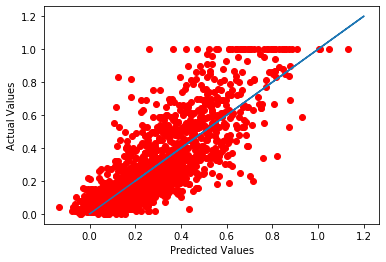

In [26]:
#PLOT
plt.plot(pred, target, 'ro')
plt.plot([0,1.2,0.2],[0,1.2,0.2])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [27]:
#RMSE using 10-fold validation

n = 10
kf = KFold(n_splits=n)
xval_err = 0

# Calculate the rmse for the 10 folds
for train, test in kf.split(comm):
    lnr_reg.fit(comm[train], target[train])
    e = lnr_reg.predict(comm[test]) - target[test]
    xval_err += np.sqrt(np.dot(e,e)/len(comm[test])) / n 
    
print('RMSE on training: %.4f' %rmse_train, "AND",'RMSE on 10-fold CV: %.4f' %xval_err)

RMSE on training: 0.1289 AND RMSE on 10-fold CV: 0.1359


**Above resulsts show that the RMSE increased after 10-fold cross validation!!!

<b>c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.

In [33]:
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(comm, target, test_size = 0.2, random_state = 1)

In [34]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 20)
x_train_fs = fs.fit_transform(x_train, y_train)
print(np.shape(x_train))

print(fs.get_support())
print(fs.scores_)
print(communities.columns[fs.get_support()])

for i in range(len(communities.columns.values)):
    if fs.get_support()[i]:
        print(communities.columns.values[i],'\t', fs.scores_[i])



(1595, 97)
[False False  True  True False False False False False False False False
 False False False  True False  True False False False False False False
 False False False False  True False  True False  True False False False
  True False  True  True False  True  True  True  True False False False
  True False False False False False False False False False False False
 False False False False False  True False  True False False False  True
  True False False  True False False False False False False False False
 False False False False False False False False False False False False
 False]
[2.51045167e+02 2.19579063e+00 1.11084476e+03 1.47211923e+03
 2.35835272e+00 1.50473300e+02 4.93277292e+00 3.56829887e+01
 1.51395807e+01 9.59636034e+00 2.43692363e+02 9.49180625e+00
 3.63306736e+02 1.71337792e+02 4.68902268e+01 8.21542444e+02
 2.62634875e+01 8.36386408e+02 1.48314853e+01 3.92571949e+02
 2.27493980e+02 7.05745981e+01 1.31172182e+02 1.56593530e+01
 3.51014385e+01 2.45860071e+01 

In [35]:
percentiles = range(1, 100, 5)
result_list = []

for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = (cross_val_score(lnr_reg, x_train_fs, y_train, cv=5, scoring = 'neg_mean_absolute_error'))
    print (i, abs(scores.mean()))
    result_list = np.append(result_list, scores.mean())

1 0.1143082919573285
6 0.1017531726544337
11 0.10193218463691685
16 0.10163951294725744
21 0.09979213564651518
26 0.09853059114903374
31 0.09768340824853873
36 0.09767372638304517
41 0.09696813767147835
46 0.09755676747828254
51 0.09783432630087344
56 0.09802883732031871
61 0.09844375161235179
66 0.0988830674973922
71 0.09941657780750722
76 0.09857444771454424
81 0.09873225791337155
86 0.09891271450025303
91 0.0988815005945688
96 0.09803055178517825


In [38]:
optimal_percentile = np.where(result_list == result_list.max())[0]
percentiles1 = np.array(percentiles)
print ("Optimal percentile of features:{0}".format(percentiles1[optimal_percentile]), "\n")
optimal_num_features = int(percentiles1[optimal_percentile] * len(communities.columns) / 100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:[41] 

Optimal number of features:39 



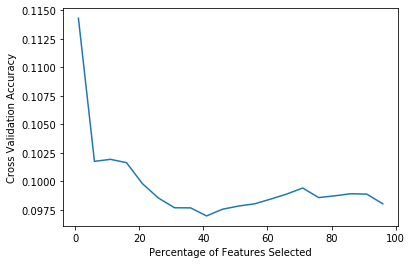

In [39]:
plt.clf()
plt.plot(percentiles1, abs(result_list))
plt.xlabel('Percentage of Features Selected')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [40]:
fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
x_train_fs = fs.fit_transform(x_train, y_train)

In [41]:
communities = pd.read_csv("communities.csv", na_values = ['?'])

In [42]:
df_comm = communities.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1, inplace = False)

In [43]:
for i in range(len(df_comm.columns.values)):
    if fs.get_support()[i]:
        print (df_comm.columns.values[i],'\t\t', fs.scores_[i])

population 		 251.04516749684805
racepctblack 		 1110.8447580308507
racePctWhite 		 1472.1192255067037
numbUrban 		 243.69236327250144
medIncome 		 363.30673630875435
pctWInvInc 		 821.5424443563828
pctWPubAsst 		 836.3864076888946
medFamInc 		 392.57194934776095
perCapInc 		 227.49398013055693
NumUnderPov 		 393.4644939777943
PctPopUnderPov 		 633.6462957908942
PctLess9thGrade 		 344.96827025175554
PctNotHSGrad 		 514.0366590270836
PctBSorMore 		 175.98345339081797
PctUnemployed 		 559.6972190971469
PctEmploy 		 211.42976242451473
MalePctDivorce 		 625.9996044212469
FemalePctDiv 		 739.8575276769049
TotalPctDiv 		 723.2175906956206
PctFam2Par 		 1651.1600857121882
PctKids2Par 		 1985.7802916511657
PctYoungKids2Par 		 1299.5388949607623
PctTeen2Par 		 1310.446659793611
NumIlleg 		 442.87187055002994
PctIlleg 		 1946.6082510963142
PctLargHouseFam 		 285.6097170756632
PctPersOwnOccup 		 613.0651845096282
PctPersDenseHous 		 426.492853483921
PctHousLess3BR 		 493.2978031722825
MedNumBR 		

In [44]:
#Mean absolute error 
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_squared_error(y_test, lr_pred)

print ('MAE of the testing data is %0.8f' % lr_mae)

MAE of the testing data is 0.02061899


<b>D.Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [50]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(comm, target)

err = ridge.predict(comm) - target
rmse_train = np.sqrt(np.dot(err, err)/len(pred))

n = 5
kf = KFold(n_splits=n)
xval_err = 0
for train, test in kf.split(comm):
    ridge.fit(comm[train], target[train])
    e = ridge.predict(comm[test])-target[test]
    xval_err += np.sqrt(np.dot(e, e)/len(comm[test])) / n

print('Method: Ridge Regression')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %xval_err)


Method: Ridge Regression
RMSE on training: 0.1294
RMSE on 5-fold CV: 0.1360


<b> E.Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.